In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 加载数据
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
data = pd.read_csv(url)
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [2]:

# 数据预处理
features = ["Pclass", "Sex", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"]
target = "Survived"  # 0 = 死亡, 1 = 幸存

# 处理缺失值
data = data.dropna(subset=features + [target])
data["Sex"] = LabelEncoder().fit_transform(data["Sex"])

# 划分训练集和测试集
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建分类树
clf = DecisionTreeClassifier(
    max_depth=3,          # 限制树深度
    min_samples_split=10, # 节点最少样本数
    min_samples_leaf=5,   # 叶节点最少样本数
    random_state=42
)

# 训练模型
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("分类树评估结果：")
print(f"- 准确率 (Accuracy): {accuracy:.2f}")
print(f"- 精确率 (Precision): {precision:.2f}")
print(f"- 召回率 (Recall): {recall:.2f}")
print(f"- F1分数: {f1:.2f}")

# 特征重要性
importance = pd.DataFrame({
    "特征": features,
    "重要性": clf.feature_importances_
}).sort_values("重要性", ascending=False)

print("\n特征重要性：")
print(importance)


分类树评估结果：
- 准确率 (Accuracy): 0.81
- 精确率 (Precision): 0.80
- 召回率 (Recall): 0.65
- F1分数: 0.72

特征重要性：
                        特征       重要性
1                      Sex  0.642650
0                   Pclass  0.200162
3  Siblings/Spouses Aboard  0.072257
5                     Fare  0.043671
2                      Age  0.041260
4  Parents/Children Aboard  0.000000


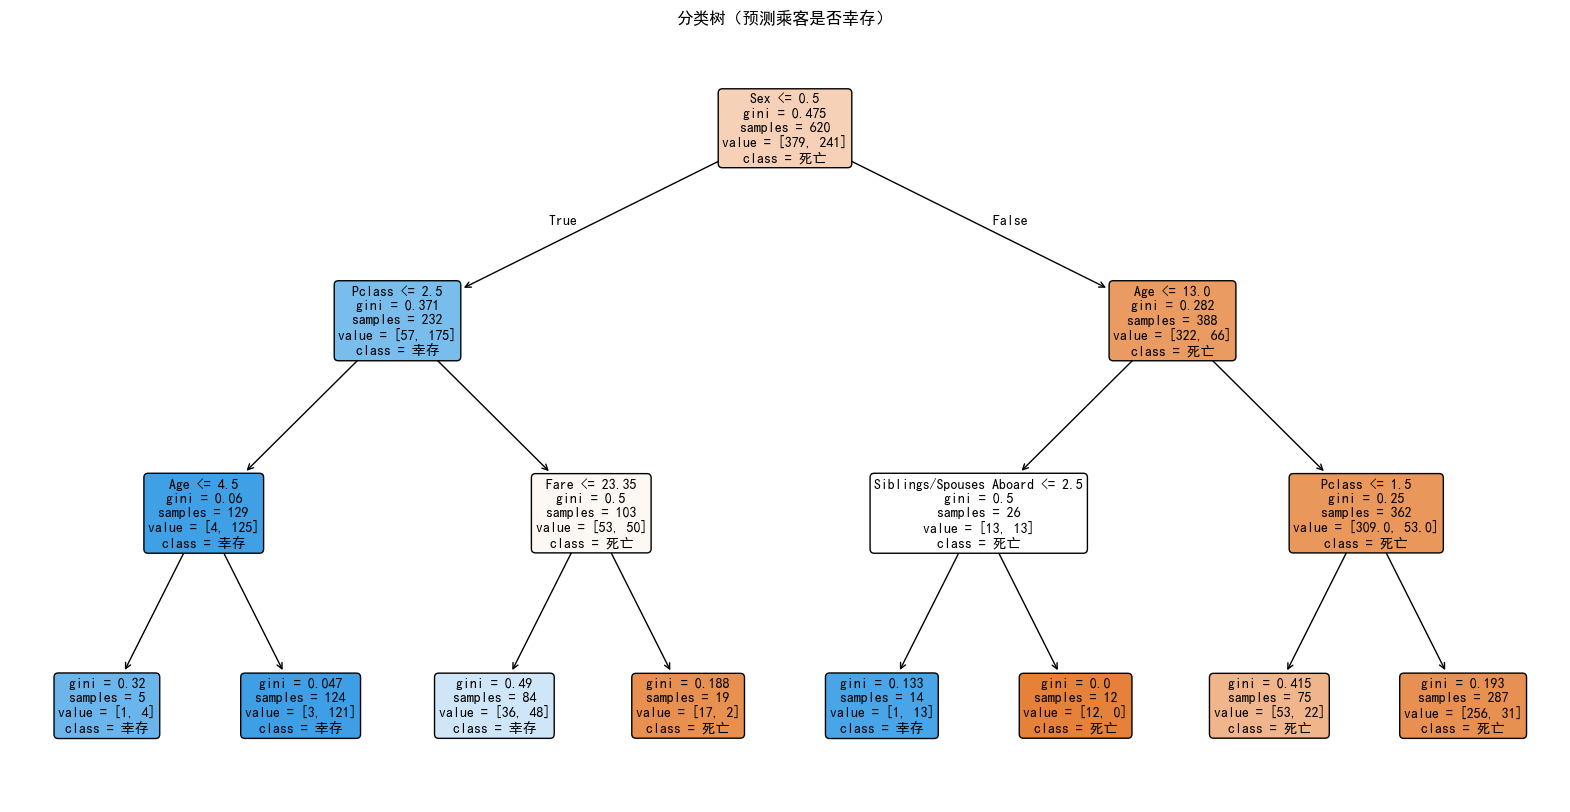

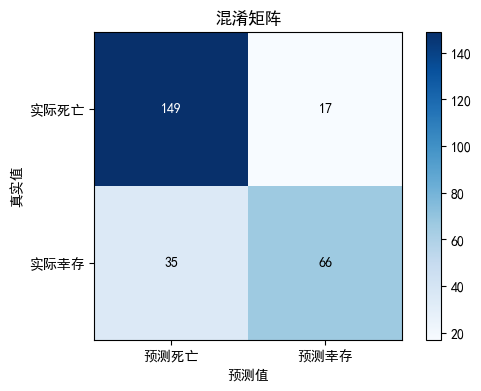

In [3]:
# 设置中文字体（任选一种）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑
# plt.rcParams['font.sans-serif'] = ['KaiTi']  # 楷体
# plt.rcParams['font.sans-serif'] = ['FangSong']  # 仿宋

# 解决负号显示问题
plt.rcParams['axes.unicode_minus'] = False
# 可视化决策树
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=features,
    class_names=["死亡", "幸存"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("分类树（预测乘客是否幸存）")
plt.show()

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("混淆矩阵")
plt.colorbar()
plt.xticks([0, 1], ["预测死亡", "预测幸存"])
plt.yticks([0, 1], ["实际死亡", "实际幸存"])
plt.xlabel("预测值")
plt.ylabel("真实值")
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > cm.max()/2 else "black")
plt.show()

In [4]:
# 数据预处理（回归任务）
features = ["Pclass", "Sex", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard"]
target = "Fare"  # 船票价格（连续变量）

# 处理缺失值
data = data.dropna(subset=features + [target])
data["Sex"] = LabelEncoder().fit_transform(data["Sex"])

# 划分训练集和测试集
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建回归树
reg = DecisionTreeRegressor(
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# 训练模型
reg.fit(X_train, y_train)

# 预测
y_pred = reg.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("回归树评估结果：")
print(f"- 均方误差 (MSE): {mse:.2f}")
print(f"- 均方根误差 (RMSE): {rmse:.2f}")
print(f"- R²分数: {r2:.2f}")

# 特征重要性
importance = pd.DataFrame({
    "特征": features,
    "重要性": reg.feature_importances_
}).sort_values("重要性", ascending=False)

print("\n特征重要性：")
print(importance)

# 可视化决策树
plt.figure(figsize=(20, 10))
plot_tree(
    reg,
    feature_names=features,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("回归树（预测船票价格）")
plt.show()

# 预测 vs 真实值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("真实船票价格")
plt.ylabel("预测船票价格")
plt.title("回归树预测结果")
plt.show()

NameError: name 'DecisionTreeRegressor' is not defined

In [5]:
# 加载数据
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
data = pd.read_csv(url)

# 创建新特征
data['FamilySize'] = data['Siblings/Spouses Aboard'] + data['Parents/Children Aboard'] + 1  # 家庭成员总数
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)  # 是否独自一人
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)  # 从姓名提取称谓
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

# 处理缺失值
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# 特征编码
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data['Title'] = data['Title'].map(title_mapping)
data['Title'].fillna(0, inplace=True)

# 选择最终特征
features = ['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'FamilySize', 'IsAlone', 'Title']
target = 'Survived'
data

<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Admin\AppData\Local\Temp\ipykernel_62708\3374377507.py:8: SyntaxWarning: invalid escape sequence '\.'
  data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)  # 从姓名提取称谓
C:\Users\Admin\AppData\Local\Temp\ipykernel_62708\3374377507.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_62708\3374377507.py:16

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,FamilySize,IsAlone,Title
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500,2,0,0.0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833,2,0,0.0
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250,1,1,0.0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000,2,0,0.0
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,1,27.0,0,0,13.0000,1,1,0.0
883,1,1,Miss. Margaret Edith Graham,0,19.0,0,0,30.0000,1,1,0.0
884,0,3,Miss. Catherine Helen Johnston,0,7.0,1,2,23.4500,4,0,0.0
885,1,1,Mr. Karl Howell Behr,1,26.0,0,0,30.0000,1,1,0.0


Fitting 5 folds for each of 48 candidates, totalling 240 fits
最佳参数: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
准确率: 0.8164794007490637


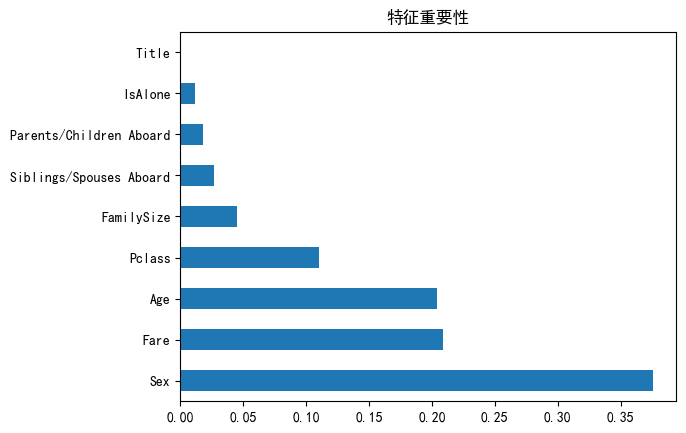

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 划分数据集
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义参数网格
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# 网格搜索
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 最佳模型
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# 评估指标
print("最佳参数:", grid_search.best_params_)
print("准确率:", accuracy_score(y_test, y_pred))

# 特征重要性可视化
feat_importances = pd.Series(best_clf.feature_importances_, index=features)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('特征重要性')
plt.show()

In [1]:
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor
from causalml.inference.meta import BaseRRegressor
from xgboost import XGBRegressor
from causalml.dataset import synthetic_data

y, X, treatment, _, _, e = synthetic_data(mode=1, n=1000, p=5, sigma=1.0)

lr = LRSRegressor()
te, lb, ub = lr.estimate_ate(X, treatment, y)
print('Average Treatment Effect (Linear Regression): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

xg = XGBTRegressor(random_state=42)
te, lb, ub = xg.estimate_ate(X, treatment, y)
print('Average Treatment Effect (XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

nn = MLPTRegressor(hidden_layer_sizes=(10, 10),
                 learning_rate_init=.1,
                 early_stopping=True,
                 random_state=42)
te, lb, ub = nn.estimate_ate(X, treatment, y)
print('Average Treatment Effect (Neural Network (MLP)): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

xl = BaseXRegressor(learner=XGBRegressor(random_state=42))
te, lb, ub = xl.estimate_ate(X, treatment, y, e)
print('Average Treatment Effect (BaseXRegressor using XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

rl = BaseRRegressor(learner=XGBRegressor(random_state=42))
te, lb, ub =  rl.estimate_ate(X=X, p=e, treatment=treatment, y=y)
print('Average Treatment Effect (BaseRRegressor using XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Failed to import duecredit due to No module named 'duecredit'


Average Treatment Effect (Linear Regression): 0.67 (0.52, 0.82)
Average Treatment Effect (XGBoost): 0.61 (0.54, 0.69)
Average Treatment Effect (Neural Network (MLP)): 0.73 (0.60, 0.86)
Average Treatment Effect (BaseXRegressor using XGBoost): 0.53 (0.49, 0.58)
Average Treatment Effect (BaseRRegressor using XGBoost): 0.57 (0.57, 0.58)
